# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

### 1. Is the distribution Normal ?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style('ggplot')

df = pd.read_csv('data/human_body_temperature.csv')

Text(0.5,1,'Histogram of Temperature')

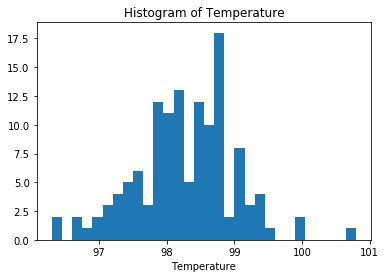

In [23]:
# Your work here.

plt.hist(df['temperature'],bins=30)
plt.xlabel('Temperature')
plt.title('Histogram of Temperature')

((array([-2.55445479, -2.22902648, -2.0419783 , -1.90719589, -1.80015121,
         -1.71047373, -1.63275826, -1.56381343, -1.50159038, -1.44469181,
         -1.39212017, -1.3431372 , -1.29718048, -1.2538112 , -1.21268003,
         -1.17350409, -1.13605091, -1.10012698, -1.06556939, -1.03223961,
         -1.00001877, -0.96880405, -0.93850586, -0.90904562, -0.88035396,
         -0.85236935, -0.82503685, -0.79830725, -0.77213622, -0.74648367,
         -0.72131321, -0.69659166, -0.67228871, -0.64837651, -0.62482945,
         -0.60162387, -0.57873784, -0.55615102, -0.53384444, -0.51180041,
         -0.49000234, -0.46843466, -0.44708273, -0.42593273, -0.40497157,
         -0.38418687, -0.36356684, -0.34310027, -0.32277642, -0.30258504,
         -0.28251629, -0.2625607 , -0.24270913, -0.22295275, -0.20328303,
         -0.18369165, -0.16417053, -0.14471177, -0.12530767, -0.10595063,
         -0.08663321, -0.06734807, -0.04808795, -0.02884566, -0.00961403,
          0.00961403,  0.02884566,  0.

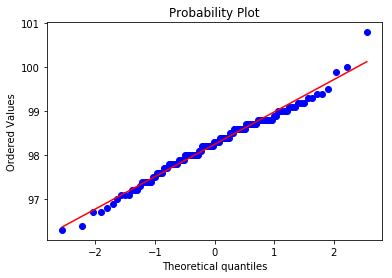

In [17]:
import scipy.stats as stats

stats.probplot(df['temperature'],dist='norm',plot=plt)


In [25]:
from scipy.stats import normaltest

normaltest(df['temperature'],nan_policy='omit')

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

Normality test (k^2 + s^2) has a 0.258 p value, indicating that the null hypothesis is true. The test indicates the temperature data is normally distributed

The histogram of temperature does not clearly indicate normality. The probability plot (qqplot) does suggest that temperature follows nromal distribution but not perfectly. Upon testing normality by D Agostino method, the normality of dataset is evident.

### 2. Is the true population mean 98.6 F

In [20]:
from statsmodels.stats.weightstats import ztest
from scipy.stats import ttest_1samp

print('Total number of samples :{}'.format(len(df['temperature'])))

print('Mean of temperature :{}'.format(df['temperature'].mean()))

print('Standard Deviation of temperature :{}'.format(df['temperature'].std()))



Total number of samples :130
Mean of temperature :98.24923076923078
Standard Deviation of temperature :0.7331831580389454


#### Ho : Mean temperature is 98.6
#### Ha : Mean temperature is not 98.6

In [21]:
ztest(df['temperature'],value=98.6)

(-5.4548232923645195, 4.9021570141012155e-08)

In [26]:
ttest_1samp(df['temperature'],98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

#### The p values of the z-test and the t-test clearly demand rejection of the null hypothesis. Therefore, mean temperature is not 98.6

### What is considered " Abnormal Temperature"

In [29]:
# 95% confidence interval

m = df['temperature'].mean()
sig = df['temperature'].std()
n = len(df['temperature'])

temp_95_con = [m - 1.96*(sig/(n**0.5)),m + 1.96*(sig/(n**0.5)) ]
temp_99_con = [m - 2.576*(sig/(n**0.5)),m + 2.576*(sig/(n**0.5)) ]

print(" Temperature interval with 95% confidence {} :".format(temp_95_con))
print(" Temperature interval with 99% confidence {} :".format(temp_99_con))


 Temperature interval with 95% confidence [98.12319411222852, 98.37526742623304] :
 Temperature interval with 99% confidence [98.08358259145638, 98.41487894700518] :


### Significant difference in normal temperature for the two genders ?

##### Ho : There is no significant difference between the avg temperature of males and average temperature of females.
##### Ha : The avg temperatures of males and females is not the same.

In [32]:
temp_m = df['temperature'][df.gender=='M']
temp_f = df['temperature'][df.gender=='F']


Average temperature observed in males 98.1046153846154
Average temperature observed in females 98.39384615384613


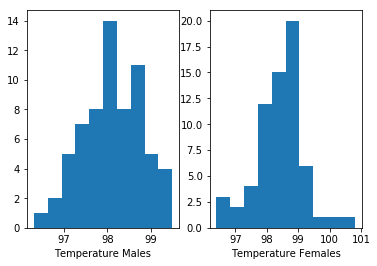

In [34]:
plt.subplot(1,2,1)
plt.hist(temp_m)
plt.xlabel('Temperature Males')

plt.subplot(1,2,2)
plt.hist(temp_f)
plt.xlabel('Temperature Females')

print('Average temperature observed in males {}'.format(temp_m.mean()))
print('Average temperature observed in females {}'.format(temp_f.mean()))


In [36]:
from scipy.stats import ttest_ind

ttest_ind(temp_m,temp_f)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)

Looking at the p value of t-test, the null hypothesis is not true and therefore it has to be rejected.